## Riemann Sum Calculator and Animation

In this notebook, we show how to calculate the left Riemann sum for a specific function (that can be changed) over an interval. (Note: I included the approximate value of the integral by hand.)

In [1]:
#this whole worksheet is modified from https://isquared.digital/blog/2020-05-27-riemann-integration/
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set a random seed
np.random.seed(42)

## Riemann Sum Calculation

In [2]:
def riemann_sum_left(f, a, b, n):
    '''Calculates the left Riemann sum of the integral.
    
    :param function f: the integrand function
    :param int a: lower bound of the integral
    :param int b: upper bound of theintergal
    :param int n: number of subintervals of equal width
    :return float: the integral of the function f between a and b
    '''
    w = (b - a)/n
    result = sum([f(a + i*w) for i in range(0, n)]) #left sum uses i=0 to n-1
    result *= w
    return result

In [3]:
f = lambda x: np.exp(x**2)  # specify a function to integrate
a, b = 0.6, 1  # the intervals of integration
N = 400  # number of points to generate
factor = 2  # increase num of rectangles every iteration

X = np.linspace(a, b, N + 1)  # generate more points on the x-axis
Y = f(X)  # generate more function values

## Animation of the Riemann Sums

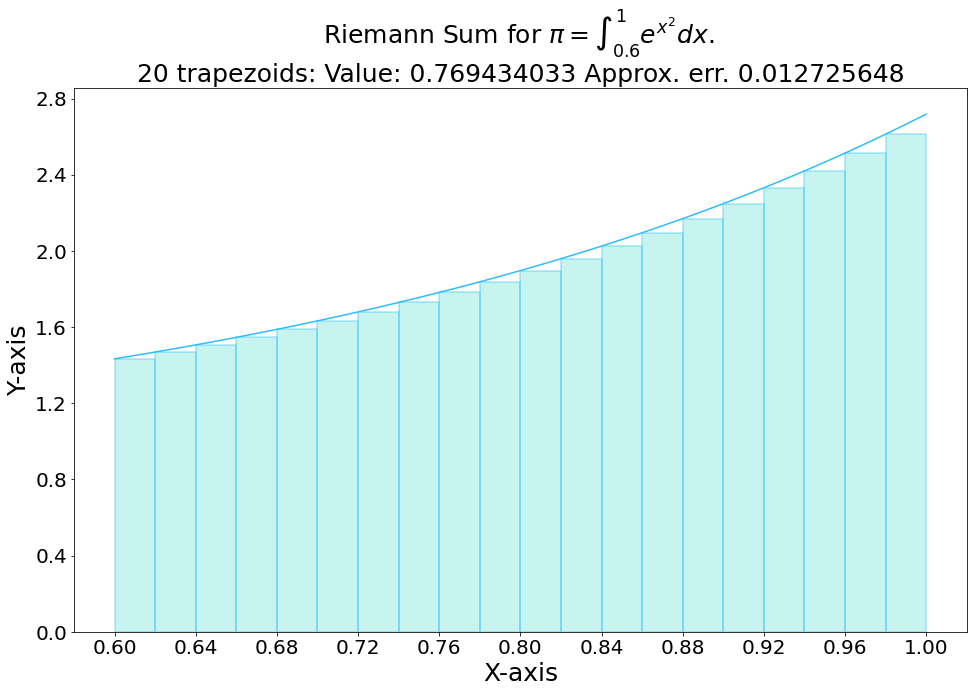

In [4]:
fig = plt.figure(figsize=(16, 10))  # make a new figure

# animation function 
def animate(i):
    plt.cla()  # clear all previous axes objects
    ax = plt.axes(xlim=(a, b), ylim = (0, 4))  # make a new axes object
    
    ax.set_xticks(np.linspace(a, b, 11))  # format the x-axis
    ax.set_xlabel('X-axis', fontsize=25)
    
    ax.set_yticks(np.linspace(0, 4, 11))  # format the y-axis
    ax.set_ylabel('Y-axis', fontsize=25)
    
    ax.tick_params(labelsize=20)  # make the ticks larger
    
    num_rectangles = (i + 1) * factor  # calculate the number of rectangles
    
    x = np.linspace(a, b, num_rectangles + 1)  # generate the intervals on the x-axis
    y = f(x)  # generate the function values
    
    y_int = riemann_sum_left(f, a, b, num_rectangles)  # calculate the integral
    err = np.abs(0.7821596811 - y_int)  # calculate the absolute error
    
    # take the function value at left end point
    x_left = x[:-1]
    y_left = y[:-1]
    
    ax.plot(X, Y, c='#2CBDFE')  # plot the function
    
    #plot the left Riemann sum rectangles
    bar = ax.bar(x_left, y_left, width=1.0*(b-a)/num_rectangles, alpha=0.3, align='edge', color='#47DBCD', edgecolor='#2CBDFE', lw=2)
    ax.set_title('Left Riemann Sum for $\pi = \int_{{0.6}}^{1} e^{{x^2}}dx$. \n' + 
                 '{0} rectangles: Value: {1:.9f} Approx. err. {2:.9f}'.format(num_rectangles, y_int, err), fontsize=25)
    
    return bar

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=10, interval=120, blit=True)
anim.save('riemann_sum_left.mp4',writer="ffmpeg")